# Algoritmo de Simon

Se nos da una función f que puede ser de dos tipos:

- 1 a 1: para cada output (out), existe un único input (inp) tal que f(inp) = out
- 2 a 1: para cada output (out), existen únicamente dos inputs (inp1, inp2) tales que f(inp1) = f(inp2) = out

Ademas se cumple que si f(inp1) = f(inp2), entonces inp1 $\oplus$ inp2 = b, para cierto b oculto.

La subrutina de Simon nos dará valores z tales que z.b = 0

In [1]:
import pennylane as qml

class Uf(qml.operation.Operation):
    
    num_wires = 6
    
    def compute_decomposition(self, wires):
        qml.CNOT(wires = [wires[0], wires[3]])
        qml.CNOT(wires = [wires[1], wires[5]])
        qml.CNOT(wires = [wires[2], wires[5]])
        
        

(<Figure size 600x700 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7feb58804610>)

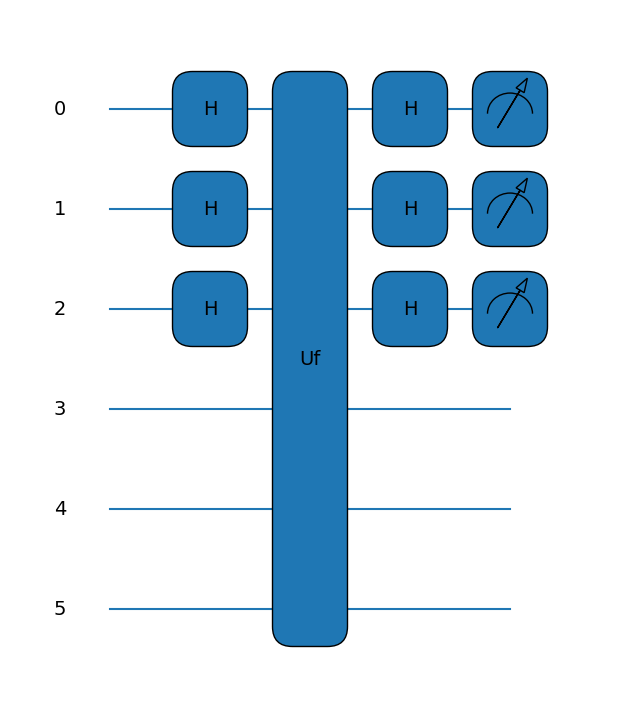

In [2]:
dev = qml.device("default.qubit", wires = 6, shots = 1)

@qml.qnode(dev)
def circuit():
    
    for i in range(3):
        qml.Hadamard(wires = i)
        
    Uf(wires = range(6))
    
    for i in range(3):
        qml.Hadamard(wires = i)
        
    return qml.sample(wires = range(3))

qml.draw_mpl(circuit)()

In [3]:

zs = []

z = circuit().tolist()
while len(zs) != 3:
    
    if z != [0,0,0] and not z in zs:
        zs.append(z)
        
    z = circuit().tolist()
        
zs

[[1, 1, 1], [1, 0, 0], [0, 1, 1]]

In [4]:
for z in zs:
    print(f"b0 x {z[0]} + b1 x {z[1]} + b2 x {z[2]} = 0")

b0 x 1 + b1 x 1 + b2 x 1 = 0
b0 x 1 + b1 x 0 + b2 x 0 = 0
b0 x 0 + b1 x 1 + b2 x 1 = 0


In [5]:
# Candidatos de b

b = [0,0,0]
B = [0,1,1]


In [6]:
# Calculariamos solo dos valores:
# f(inp) para el inp que queramos, 
# f(inp + b). Si coiciden es un función 2 a 1.
# En esta celda pintaremos todo

@qml.qnode(dev)
def circuit(x):
  
    qml.BasisEmbedding(x, wires = range(3))
    
    Uf(wires = range(6))
   
    return qml.sample(wires = range(3, 6))

for x in range(8):
    print(circuit(x))

[0 0 0]
[0 0 1]
[0 0 1]
[0 0 0]
[1 0 0]
[1 0 1]
[1 0 1]
[1 0 0]
